# Исследование объявлений о продаже квартир


В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

*В ходе исследования мы поработаем с пропусками и дубликатами в предоставленной базе данных, проверим датафрейм на правильность заполнения по типам данных, посчитаем и добавим некоторые необходимые показатели, и в финале проведем анализ данных рынка недвижимости в Ленинградской области.*

*Основной целью проекта является установление зависимостей цены недвижимости от различных критериев - площади, этажа, расстояния до центра города и других. И определение рыночной стоимости квартир, основываясь на этих параметрах*


*Вместе с тем мы определим среднюю стоимость за квадратный метр недвижимости во всех предоставленных в базе городах и узнаем самые популярные города, в которых больше всего объявлений о продаже.*

**Описание данных:**
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении


## Изучение данных из файла

Начнем с импорта необходимых библиотек, чтения файла базы данных, и после этого выведем первые 10 строк на экран

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('real_estate_data.csv', sep='\t') #делаем через разделитель sep='\t', поскольку в файле csv данные разделены символом t
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Обратимся к функции `.info()` для просмотра информации о предоставленной базе данных

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим долю пропущенных значений в датафрейме

In [3]:
df.isnull().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

### Вывод

После изучения вводных данных, можно сделать промежуточные выводы:
- Наш датафрейм состоит из 22 столбцов и 23699 строк
- В столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` есть пропущенные значения, которые нужно обработать
- В некоторых столбцах типы данных не соответствуют их логическому значению, например в `first_day_exposition`
- В столбце `locality_name` нужно поработать с литтерацией, чтобы привести все к одному виду
- Название столбца `cityCenters_nearest` выбивается из общего вида датафрейма. 

## Предобработка данных

### Обработка пропущенных значений

#### Пропущенные значения в ceiling_height

Начнем по порядку обрабатывать пропущенные значения в датафрейме.  
Первый столбец `ceiling_height`  
Посмотрим его уникальные значения, и количество пропущенных, выведем на экран для наглядности

In [4]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [5]:
df.value_counts('ceiling_height')

ceiling_height
2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
3.88         1
3.93         1
3.98         1
4.06         1
100.00       1
Length: 183, dtype: int64

9195

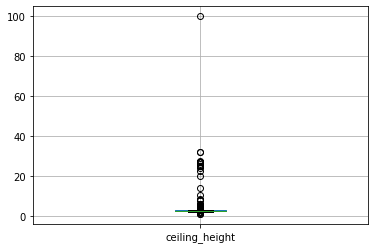

In [6]:
df.boxplot('ceiling_height')
df['ceiling_height'].isna().sum()

Видим, что основная часть значений нахоидтся в разумных пределах (до  4м), и одно значение, где высота потолков равна 100м. 
Заменим пропущенные значения в этом столбце медианой. 

In [7]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Проверим себя, что все пропущенные значения заполнились 

In [8]:
df['ceiling_height'].isna().sum()

0

Посмотрим строчку, где значение высоты потолка равно 100, чтобы понять что с ней дальше делать

In [9]:
df.query('ceiling_height == 100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Апартаменты площадью 25м2 вряд ли может иметь 100-метровый потолок, поменяем его высоту на медианное значение, чтобы в будущем эта строка не выбивалась в общих выводах

In [10]:
df.loc[22869, 'ceiling_height'] = df['ceiling_height'].median()
df.loc[22869]

total_images                              0
last_price                       15000000.0
total_area                             25.0
first_day_exposition    2018-07-25T00:00:00
rooms                                     1
ceiling_height                         2.65
floors_total                            5.0
living_area                            14.0
floor                                     5
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                           11.0
balcony                                 5.0
locality_name               Санкт-Петербург
airports_nearest                    34963.0
cityCenters_nearest                  8283.0
parks_around3000                        1.0
parks_nearest                         223.0
ponds_around3000                        3.0
ponds_nearest                          30.0
days_exposition                        19.0
Name: 22869, dtype: object

#### Пропущенные значения в total_area

Изучим пропущенные значения в столбце `total_area` и есть ли в нем анамалии

<AxesSubplot:>

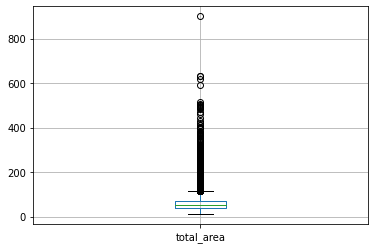

In [11]:
df.boxplot('total_area')

Основное количество квартир в продаже находится в диапазоне 15-150м2.
Уберем вбросы, где площади больше 500м2

In [12]:
df = df[df['total_area']<500]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23690 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23690 non-null  int64  
 1   last_price            23690 non-null  float64
 2   total_area            23690 non-null  float64
 3   first_day_exposition  23690 non-null  object 
 4   rooms                 23690 non-null  int64  
 5   ceiling_height        23690 non-null  float64
 6   floors_total          23604 non-null  float64
 7   living_area           21790 non-null  float64
 8   floor                 23690 non-null  int64  
 9   is_apartment          2774 non-null   object 
 10  studio                23690 non-null  bool   
 11  open_plan             23690 non-null  bool   
 12  kitchen_area          21413 non-null  float64
 13  balcony               12176 non-null  float64
 14  locality_name         23641 non-null  object 
 15  airports_nearest   

#### Пропущенные значения в last_price

Посмотрим на значения в `last_price` и проверим их на аномалии

In [13]:
pd.options.display.float_format = '{:.2f}'.format
df['last_price'].describe()

count       23690.00
mean      6477381.36
std      10136992.26
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6790000.00
max     763000000.00
Name: last_price, dtype: float64

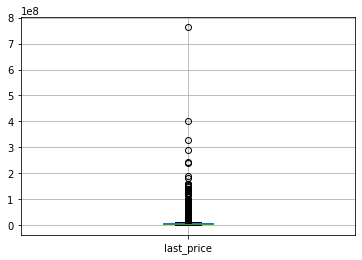

In [14]:
df.boxplot('last_price');

Почти все значения сосредоточены в ценах до 10 млн, а среднее значение с медианой сильно разятся. Посчитаем, сколько у нас квартир, которые дороже 40 млн рублей.

In [15]:
len(df.query('last_price > 40000000'))

173

Уберем их из датафрейма, поскольку эти вбросы помешают нашему дальнейшему исследованию

In [16]:
df = df[df['last_price']<40000000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23505 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23505 non-null  int64  
 1   last_price            23505 non-null  float64
 2   total_area            23505 non-null  float64
 3   first_day_exposition  23505 non-null  object 
 4   rooms                 23505 non-null  int64  
 5   ceiling_height        23505 non-null  float64
 6   floors_total          23420 non-null  float64
 7   living_area           21624 non-null  float64
 8   floor                 23505 non-null  int64  
 9   is_apartment          2750 non-null   object 
 10  studio                23505 non-null  bool   
 11  open_plan             23505 non-null  bool   
 12  kitchen_area          21250 non-null  float64
 13  balcony               12077 non-null  float64
 14  locality_name         23456 non-null  object 
 15  airports_nearest   

Миннимальное значение, какое-то слишком маленькое, посмотрим, сколько в датафрейме значений меньше 500000р

In [17]:
len(df.query('last_price < 500000'))

14

Всего 14 квартир по невероятно низкой цене, уберем эти аномалии

In [18]:
df = df[df['last_price'] >500000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23487 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23487 non-null  int64  
 1   last_price            23487 non-null  float64
 2   total_area            23487 non-null  float64
 3   first_day_exposition  23487 non-null  object 
 4   rooms                 23487 non-null  int64  
 5   ceiling_height        23487 non-null  float64
 6   floors_total          23402 non-null  float64
 7   living_area           21612 non-null  float64
 8   floor                 23487 non-null  int64  
 9   is_apartment          2750 non-null   object 
 10  studio                23487 non-null  bool   
 11  open_plan             23487 non-null  bool   
 12  kitchen_area          21239 non-null  float64
 13  balcony               12075 non-null  float64
 14  locality_name         23438 non-null  object 
 15  airports_nearest   

#### Пропущенные значения в floors_total, living_area, kitchen_area

В этих столбцах я бы оставил пропущенные значения как NaN, поскольку у нас нет подходящих значений для замены. 
Посмотрим их процентное отношение к общему количеству записей.

In [19]:
df.isnull().mean()

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.00
floors_total           0.00
living_area            0.08
floor                  0.00
is_apartment           0.88
studio                 0.00
open_plan              0.00
kitchen_area           0.10
balcony                0.49
locality_name          0.00
airports_nearest       0.23
cityCenters_nearest    0.23
parks_around3000       0.23
parks_nearest          0.66
ponds_around3000       0.23
ponds_nearest          0.62
days_exposition        0.13
dtype: float64

Количество пропусков - меньше 0.1%, удалим, чтобы не мешали нашему исследованию.

In [20]:
df = df.dropna(subset=['floors_total', 'living_area', 'kitchen_area'])

In [21]:
df.isnull().mean()

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.00
floors_total           0.00
living_area            0.00
floor                  0.00
is_apartment           0.88
studio                 0.00
open_plan              0.00
kitchen_area           0.00
balcony                0.47
locality_name          0.00
airports_nearest       0.22
cityCenters_nearest    0.22
parks_around3000       0.22
parks_nearest          0.66
ponds_around3000       0.22
ponds_nearest          0.62
days_exposition        0.14
dtype: float64

#### Пропущенные значения в is_apartment


Посмотрим какие значения есть в столбце "апартаменты" 

In [22]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

У нас есть NaN, True, False. Скорее всего, **True** - это означает, что помещение является аппартаментамии, **False** - не является, **NaN** - не заполнено пользователем, а это значит, что помещение - не аппартаменты.  
Поменяем тип данных в столбце на *bool* и заменим пропущенные значения на **False**. 

In [23]:
df['is_apartment'] = df['is_apartment'].astype(bool)
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].unique()

array([ True, False])

In [24]:
#Проверим, что все пропущенные значения ушли
df['is_apartment'].isna().sum()

0

In [25]:
df.isnull().mean()

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.00
floors_total           0.00
living_area            0.00
floor                  0.00
is_apartment           0.00
studio                 0.00
open_plan              0.00
kitchen_area           0.00
balcony                0.47
locality_name          0.00
airports_nearest       0.22
cityCenters_nearest    0.22
parks_around3000       0.22
parks_nearest          0.66
ponds_around3000       0.22
ponds_nearest          0.62
days_exposition        0.14
dtype: float64

#### Пропущенные значения в balcony

Проверим пропущенные какие уникальные значения есть в столбце `balcony` и сколько у нас пропущенных значений

In [26]:
df.value_counts('balcony')

balcony
1.00    3939
2.00    3334
0.00    3313
5.00     277
4.00     169
3.00      72
dtype: int64

9663

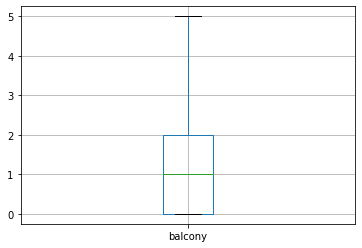

In [27]:
df.boxplot('balcony')
df['balcony'].isna().sum()

Аномалий особо не видно, есть несколько квартир с 5 балконами, ну, допустим. 
Если данные заполнялись вручную, то скорее всего пропущенные значения - это отсутствие балконов, заменим их на "0"

In [28]:
df['balcony'] = df['balcony'].fillna(0).astype(int)
df['balcony']

0        0
1        2
2        0
4        0
5        0
        ..
23692    0
23693    0
23694    0
23695    0
23698    0
Name: balcony, Length: 20767, dtype: int64

#### Пропущенные значения - аэропорты, парки, пруды

В столбцах `airports_nearest`, `parks_around3000`, `parks_nearest` , `ponds_around3000`, `ponds_nearest` показаны расстояния до ключевых точек на карте, пропущенные значения целесообразно заменить на нули, для удобства дальнейшего анализа

In [29]:
columns_to_replace = ['airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for i in columns_to_replace:
    df[i] = df[i].fillna(0)

Посмотрим данные в этих столбцах на аномалии

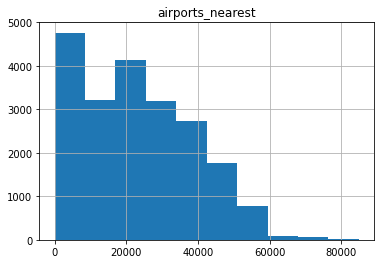

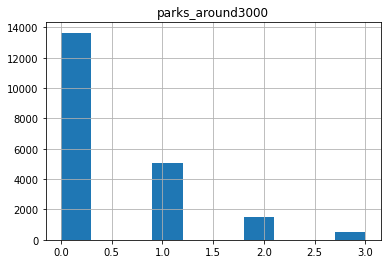

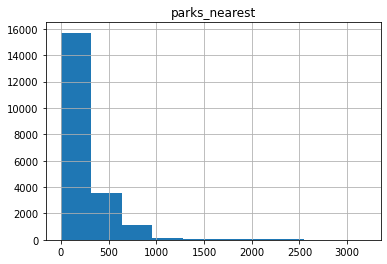

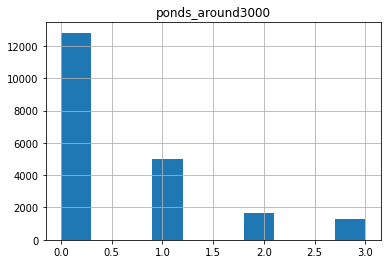

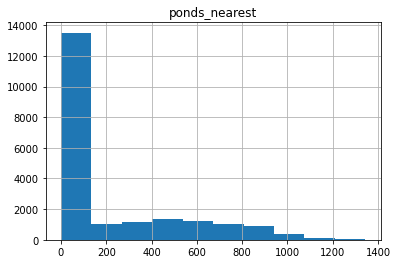

In [30]:
for i in columns_to_replace:
    df.hist(i)

Аномальных значений не наблюдается

#### Пропущенные значения в days_exposition и cityCenters_nearest

Пропущенные значения в стобце `days_exposition` верояетно всего являются знаком того, что объявление еще не снято с публикации, оставим NaN.
В `cityCenters_nearest` вероятно пропущенные значения еще могут нам пригодиться, их трогать тоже не будем

#### Пропущенные значения locality_name

Проверим пропущенные значения в столбце `locality_name`

In [31]:
loc_sum = df['locality_name'].isna().sum()
print(f'В столбце locality_name {loc_sum} пропущенных значений, что составляет {(loc_sum/23699):.2%} от всего датафрейма')

В столбце locality_name 38 пропущенных значений, что составляет 0.16% от всего датафрейма


Лучше удалить такие строки, поскольку без названия населенного пунка наше исследование не имело бы смысла

In [32]:
 df.dropna(subset=['locality_name'], inplace=True)

#### Промежуточный вывод 

Применим функцию `.isna().sum()` чтобы посмотреть, что все пропущенные значения заполнились

In [33]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest     4630
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2846
dtype: int64

### Замена типов данных 

#### Столбец cityCenters_nearest

Переименуем столбец `cityCenters_nearest` и приведем его к змеиному регистру

In [34]:
df = df.rename(columns={'cityCenters_nearest' : 'city_сenters_nearest'})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Столбец first_day_exposition

Приведем столбец `first_day_exposition` к типу **datetime**

In [35]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT')
df['first_day_exposition'].head(5)

0   2019-03-07
1   2018-12-04
2   2015-08-20
4   2018-06-19
5   2018-09-10
Name: first_day_exposition, dtype: datetime64[ns]

####  Замена типов данных в остальных столбцах
     

Поменяем типы данных в следующих столбцах:  

- `last_price` → на *int*,  копейки тут излишни
- `floors_total` → на *int*, общее количество этажей должно быть целым числом

Так же у нас есть последние столбцы с расстояниями до ключевых точек, там можно оставить и дробные, это ни на что не повлияет


In [36]:
df.astype({'last_price': 'int', 'floors_total': 'Int64'}).dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_сenters_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Посмотрим, как теперь выглядит наш датафрейм 

In [37]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,...,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,True,...,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,0.00,0.00,0.00,81.00
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,True,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,...,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10,1,2.65,12.00,14.40,5,True,...,9.10,0,городской посёлок Янино-1,0.00,NaN,0.00,0.00,0.00,0.00,55.00
6,6,3700000.00,37.30,2017-11-02,1,2.65,26.00,10.60,6,True,...,14.40,1,посёлок Парголово,52996.00,19143.00,0.00,0.00,0.00,0.00,155.00
8,20,2900000.00,33.16,2018-05-23,1,2.65,27.00,15.43,26,True,...,8.81,0,посёлок Мурино,0.00,NaN,0.00,0.00,0.00,0.00,189.00
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,True,...,6.50,2,Санкт-Петербург,50898.00,15008.00,0.00,0.00,0.00,0.00,289.00
10,5,5050000.00,39.60,2017-11-16,1,2.67,12.00,20.30,3,True,...,8.50,0,Санкт-Петербург,38357.00,13878.00,1.00,310.00,2.00,553.00,137.00
11,9,3300000.00,44.00,2018-08-27,2,2.65,5.00,31.00,4,False,...,6.00,1,Ломоносов,48252.00,51677.00,0.00,0.00,0.00,0.00,7.00


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20729 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20729 non-null  int64         
 1   last_price            20729 non-null  float64       
 2   total_area            20729 non-null  float64       
 3   first_day_exposition  20729 non-null  datetime64[ns]
 4   rooms                 20729 non-null  int64         
 5   ceiling_height        20729 non-null  float64       
 6   floors_total          20729 non-null  float64       
 7   living_area           20729 non-null  float64       
 8   floor                 20729 non-null  int64         
 9   is_apartment          20729 non-null  bool          
 10  studio                20729 non-null  bool          
 11  open_plan             20729 non-null  bool          
 12  kitchen_area          20729 non-null  float64       
 13  balcony         

Все отлично, все данные в понятном формате

### Поиск и устранение дубликатов

#### Замена дубликатов в locality_name

Посмотрим список уникальных значений в *locality_name*

In [39]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Советский', 'городской посёлок Фёдоро

Уберем все второстепенные слова и оставим только именительные, поскольку видим много неявных повторов, например "посЁлок" и "посЕлок"

In [40]:
def replace_names(wrong_name, correct_name):
    '''
    Функция удаления слов в значениях, если они есть в представленном списке. 
    '''
    for element in wrong_name:
        df['locality_name'] = df['locality_name'].str.replace(element, correct_name)

In [41]:
wrong_list= ['городской поселок ', 'деревня ', 'коттеджный поселок ', 'поселок ', 'поселок городского типа ',
              'поселок станции ', 'посёлок ', 'посёлок городского типа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'село ', 'городского типа', 'городской ', 'при железнодорожной станции'
            , 'станции', 'коттеджный ']
correct_list = ''
replace_names(wrong_list, correct_list)

In [42]:
df['locality_name'] = df['locality_name'].str.strip() #уберем проблемы в начале некоторых названий

In [43]:
df['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вещево', 'Виллози',
       'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'К

#### Замена явных дубликатов

Проведем проверку на наличие явных дубликатов, если они есть - то удалим, если нет, то можно двигаться дальше

In [44]:
df.duplicated().sum()

0

И еще посмотрю, есть ли ошибка в этажности помещений. По логике - этаж квартиры не должен быть больше значения в `floors_total`

In [45]:
df.query('floor > floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


## Расчёты и добавление результатов в таблицу

#### Стоимость квадратного метра

Добавим стоимость квадратного метра каждой квартиры, это важное значение в подборе квартиры

In [46]:
df['squaremeter_price'] = df['last_price'] / df['total_area']
df['squaremeter_price'] = df['squaremeter_price'].astype(int)

In [47]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,squaremeter_price
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,...,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,True,...,2,Шушары,12817.00,18603.00,0.00,0.00,0.00,0.00,81.00,82920
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,True,...,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,...,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,100000
5,10,2890000.00,30.40,2018-09-10,1,2.65,12.00,14.40,5,True,...,0,Янино-1,0.00,NaN,0.00,0.00,0.00,0.00,55.00,95065
6,6,3700000.00,37.30,2017-11-02,1,2.65,26.00,10.60,6,True,...,1,Парголово,52996.00,19143.00,0.00,0.00,0.00,0.00,155.00,99195
8,20,2900000.00,33.16,2018-05-23,1,2.65,27.00,15.43,26,True,...,0,Мурино,0.00,NaN,0.00,0.00,0.00,0.00,189.00,87454
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,True,...,2,Санкт-Петербург,50898.00,15008.00,0.00,0.00,0.00,0.00,289.00,88524
10,5,5050000.00,39.60,2017-11-16,1,2.67,12.00,20.30,3,True,...,0,Санкт-Петербург,38357.00,13878.00,1.00,310.00,2.00,553.00,137.00,127525
11,9,3300000.00,44.00,2018-08-27,2,2.65,5.00,31.00,4,False,...,1,Ломоносов,48252.00,51677.00,0.00,0.00,0.00,0.00,7.00,75000


#### День недели, месяц и год публикации объявления

Добавим в наш датафрейм столбцы с днем, месяцем и годом публикации объявления, для этого поработаем с округлением столбца `first_day_exposition`

In [48]:
df['exposition_year'] = df['first_day_exposition'].dt.year
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_day'] = df['first_day_exposition'].dt.day
df[['first_day_exposition', 'exposition_year', 'exposition_month', 'exposition_day']] #проверяемся

,first_day_exposition,exposition_year,exposition_month,exposition_day
0,2019-03-07,2019,3,7
1,2018-12-04,2018,12,4
2,2015-08-20,2015,8,20
4,2018-06-19,2018,6,19
5,2018-09-10,2018,9,10
...,...,...,...,...
23692,2017-07-07,2017,7,7
23693,2016-08-05,2016,8,5
23694,2017-03-21,2017,3,21
23695,2018-01-15,2018,1,15


#### Категоризация по этажам

Создадим функцию, которая присвоит категорию по этажу квартиры - первый, последний, другой

In [49]:
def floor_category_func(floor, floors_total): 
    """
    Возвращает категорию первый, последний или другой по значению этажа floor 
    """
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'
   

In [50]:
df['floor_category'] = df.apply(lambda x: floor_category_func(x['floor'], x['floors_total']), axis=1)

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,squaremeter_price,exposition_year,exposition_month,exposition_day,floor_category
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,...,1.00,482.00,2.00,755.00,NaN,120370,2019,3,7,другой
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,True,...,0.00,0.00,0.00,0.00,81.00,82920,2018,12,4,первый
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,True,...,1.00,90.00,2.00,574.00,558.00,92785,2015,8,20,другой
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,...,2.00,112.00,1.00,48.00,121.00,100000,2018,6,19,другой
5,10,2890000.00,30.40,2018-09-10,1,2.65,12.00,14.40,5,True,...,0.00,0.00,0.00,0.00,55.00,95065,2018,9,10,другой
6,6,3700000.00,37.30,2017-11-02,1,2.65,26.00,10.60,6,True,...,0.00,0.00,0.00,0.00,155.00,99195,2017,11,2,другой
8,20,2900000.00,33.16,2018-05-23,1,2.65,27.00,15.43,26,True,...,0.00,0.00,0.00,0.00,189.00,87454,2018,5,23,другой
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,True,...,0.00,0.00,0.00,0.00,289.00,88524,2017,2,26,другой
10,5,5050000.00,39.60,2017-11-16,1,2.67,12.00,20.30,3,True,...,1.00,310.00,2.00,553.00,137.00,127525,2017,11,16,другой
11,9,3300000.00,44.00,2018-08-27,2,2.65,5.00,31.00,4,False,...,0.00,0.00,0.00,0.00,7.00,75000,2018,8,27,другой


#### Соотношения площадей

Посчитаем отношение жилой и общей площади, а также отношение площади кухни к общей.

In [51]:
df['living_to_total_area'] = df['living_area'] / df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']
df[['living_to_total_area', 'kitchen_to_total_area' ]]
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,squaremeter_price,exposition_year,exposition_month,exposition_day,floor_category,living_to_total_area,kitchen_to_total_area
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,...,2.00,755.00,NaN,120370,2019,3,7,другой,0.47,0.23
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,True,...,0.00,0.00,81.00,82920,2018,12,4,первый,0.46,0.27
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,True,...,2.00,574.00,558.00,92785,2015,8,20,другой,0.61,0.15
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,...,1.00,48.00,121.00,100000,2018,6,19,другой,0.32,0.41
5,10,2890000.00,30.40,2018-09-10,1,2.65,12.00,14.40,5,True,...,0.00,0.00,55.00,95065,2018,9,10,другой,0.47,0.30


## Исследовательский анализ данных

#### Исследование заданных параметров

Изучим получившиеся параметры из датафрейма

In [52]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,20729.00,20729.00,20729.00,20729.00
mean,59.17,5918354.48,2.08,2.71
std,29.31,4476742.42,1.03,0.74
min,14.00,520000.00,1.00,1.00
25%,40.30,3500000.00,1.00,2.60
50%,52.00,4658410.00,2.00,2.65
75%,69.00,6700000.00,3.00,2.70
max,470.30,39990000.00,19.00,32.00


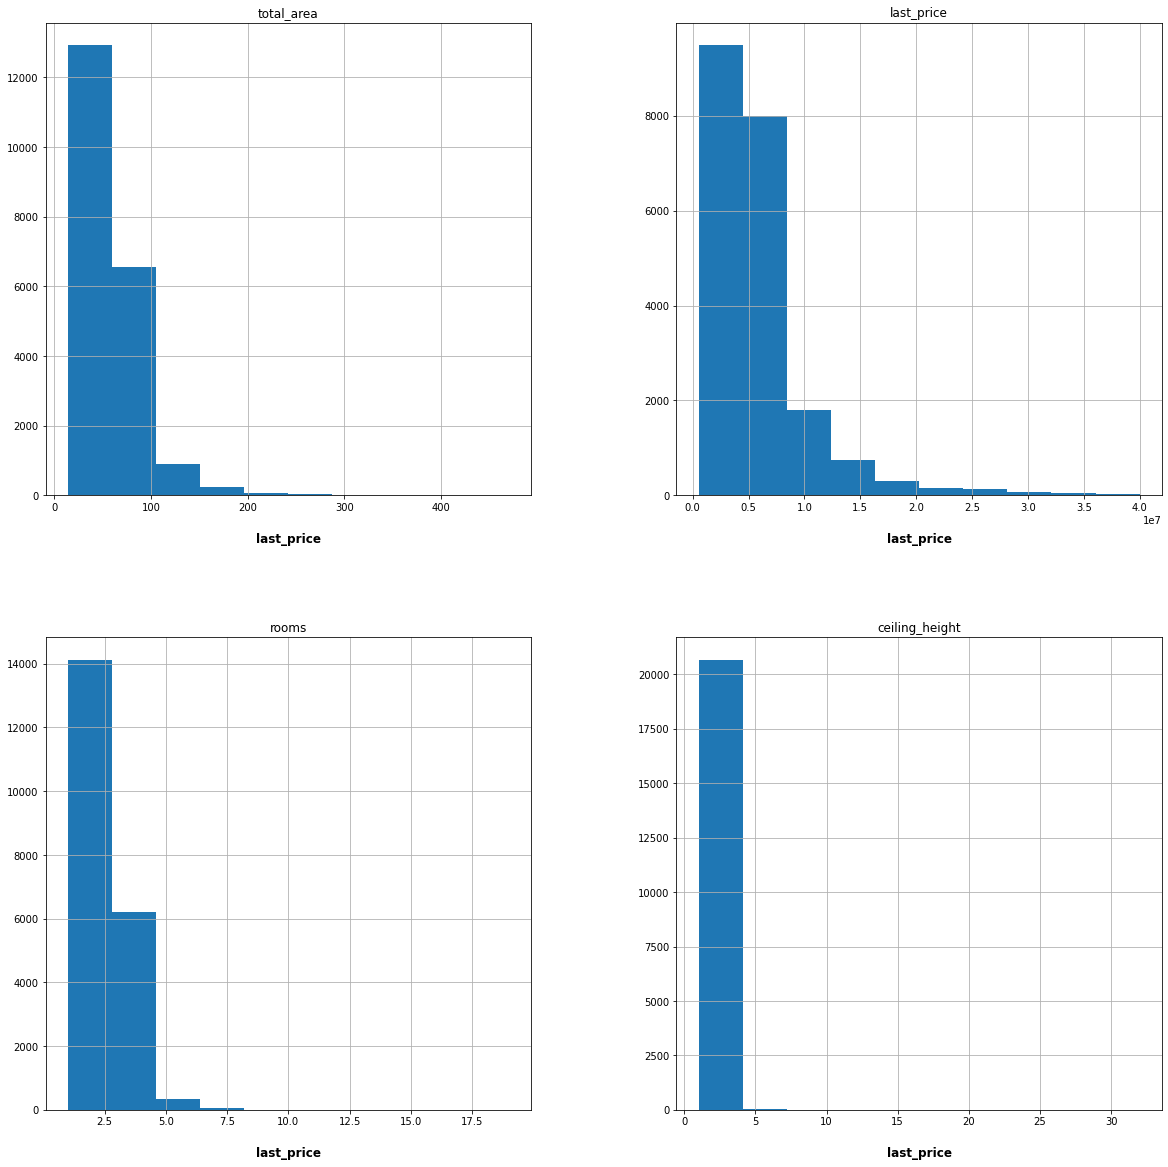

In [53]:
ax = df[['total_area', 'last_price', 'rooms', 'ceiling_height']].hist(bins=10, figsize = (20,20))
ax = np.concatenate((ax[0], ax[1]))
for x in ax:
    x.set_xlabel('last_price', labelpad=20, weight='bold', size=12)

В целом с данными все нормально, вбросы видны только в столбце с ценой квартиры, но пока что не ясно, можно ли это считать вбросом, или это реальная цена продажи квартиры, просто за очень большую сумму. Дальше мы с этим разберемся

#### Скорость продажи квартиры

Изучим время, за которое квартира продавалась, рассмотрим подробнее столбец `days_exposition`

In [54]:
df['days_exposition'].describe()

count   17883.00
mean      184.52
std       221.30
min         1.00
25%        44.00
50%       101.00
75%       237.00
max      1580.00
Name: days_exposition, dtype: float64

<AxesSubplot:>

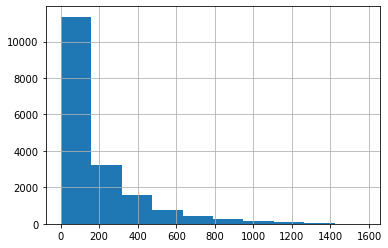

In [55]:
df['days_exposition'].hist()

<AxesSubplot:>

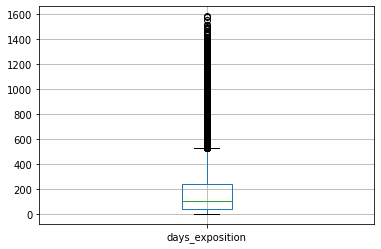

In [56]:
df.boxplot('days_exposition')

По построенным гистограмме и диаграмме размаха видно, что чаще всего объявления о продаже квартир размещены до 180 дней, т.е. около полугода.
Некоторые объявления висят от 600 до 1600 дней, посмотрим их количество:

In [57]:
len(df.query('days_exposition > 600')) / 18020 


0.05948945615982242

6% объявлений , про которые, по всей видимости, забыли.  
Посмотрим теперь сколько объявлений, которые убирают за короткий срок:

In [58]:
df.query('days_exposition < 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,squaremeter_price,exposition_year,exposition_month,exposition_day,floor_category,living_to_total_area,kitchen_to_total_area
11,9,3300000.00,44.00,2018-08-27,2,2.65,5.00,31.00,4,False,...,0.00,0.00,7.00,75000,2018,8,27,другой,0.70,0.14
53,7,4300000.00,39.10,2017-11-10,1,2.65,25.00,15.40,13,True,...,0.00,0.00,6.00,109974,2017,11,10,другой,0.39,0.40
62,0,4800000.00,78.60,2017-09-17,3,2.80,9.00,48.80,5,True,...,0.00,0.00,5.00,61068,2017,9,17,другой,0.62,0.15
70,9,3400000.00,30.00,2018-09-05,1,2.65,5.00,16.00,1,True,...,0.00,0.00,14.00,113333,2018,9,5,первый,0.53,0.23
94,3,3500000.00,29.50,2019-04-26,1,2.50,5.00,15.60,2,True,...,0.00,0.00,4.00,118644,2019,4,26,другой,0.53,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23599,3,3700000.00,45.20,2017-11-10,2,2.65,5.00,30.40,5,True,...,1.00,116.00,13.00,81858,2017,11,10,последний,0.67,0.13
23606,0,2850000.00,68.00,2018-07-29,1,3.00,5.00,41.00,3,True,...,3.00,327.00,4.00,41911,2018,7,29,другой,0.60,0.15
23641,3,3100000.00,30.00,2018-03-28,1,2.50,5.00,17.00,5,True,...,0.00,0.00,10.00,103333,2018,3,28,последний,0.57,0.17
23647,9,5700000.00,45.60,2019-01-09,1,2.75,16.00,18.70,6,True,...,0.00,0.00,8.00,125000,2019,1,9,другой,0.41,0.39


Не так уж и много, бывают случаи, когда квартиры продаются и за 1 день. 
А вот объявления-вбросы лучше удалить.

In [59]:
df =df[df['days_exposition']<600]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16807 entries, 1 to 23695
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           16807 non-null  int64         
 1   last_price             16807 non-null  float64       
 2   total_area             16807 non-null  float64       
 3   first_day_exposition   16807 non-null  datetime64[ns]
 4   rooms                  16807 non-null  int64         
 5   ceiling_height         16807 non-null  float64       
 6   floors_total           16807 non-null  float64       
 7   living_area            16807 non-null  float64       
 8   floor                  16807 non-null  int64         
 9   is_apartment           16807 non-null  bool          
 10  studio                 16807 non-null  bool          
 11  open_plan              16807 non-null  bool          
 12  kitchen_area           16807 non-null  float64       
 13  b

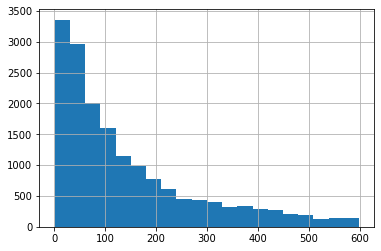

In [60]:
df['days_exposition'].hist(bins=20);

Теперь на много лучше, по нашей гистограмме видно, что чаще всего квартиры продаются за 1-50 дней

#### Факторы, влияющие на стоимость квартиры

Изучим параметры:
- цена/площадь
- цена/количество комнат
- цена/этаж
- цена/удалённость от центра

Посмотрим на коэффициенты корреляции столбцов `last_price`, `total_area`, `rooms`, `city_сenters_nearest`

In [61]:
df1 = df[['last_price', 'total_area', 'rooms', 'city_сenters_nearest']]
df1.corr()

,last_price,total_area,rooms,city_сenters_nearest
last_price,1.00,0.78,0.51,-0.33
total_area,0.78,1.00,0.79,-0.21
rooms,0.51,0.79,1.00,-0.16
city_сenters_nearest,-0.33,-0.21,-0.16,1.00


По данным коэффициентов корреляции Пирсона можно сделать следующие выводы:
- Цена тем ниже, чем дальше расположена от цента
- Цена растет практически пропорционально общей площади квартиры
- Чем больше комнат - тем выше цена

Визуализируем данные:

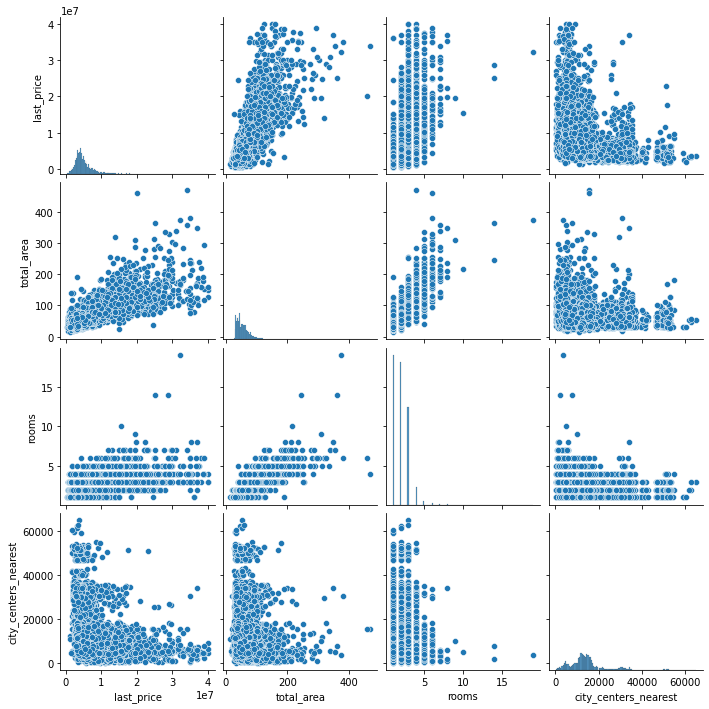

In [62]:
sns.pairplot(df1)

На матрице диаграмм рассеяния наши выводы по коэффициентам корреляции подтвердились визуализацией данных.

Посмотрим на зависимость цены от категории этажа:

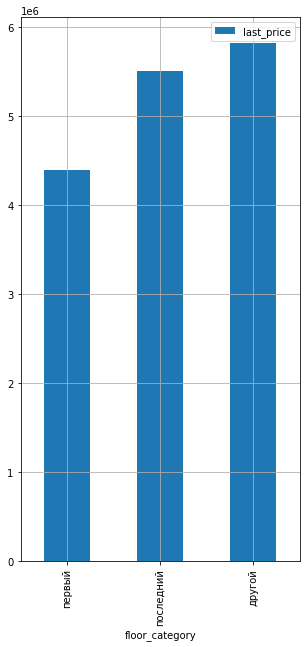

In [63]:
df.pivot_table(index='floor_category', values='last_price')\
    .sort_values(by='last_price', ascending=True)\
    .plot(grid=True, figsize=(5,10), kind='bar');

Самые дешевые квартиры - на первом этаже, самые дорогие на последнем. 
Квартиры в категории **другие** имеют промежуточную стоимость - можно сказать, что они имеют самую реалистичную рыночную стоимость. 



Прямой свзяи между ценой и расстоянием до центра города нет, однако по графику видно, что есть населенные пункты, в которых сосредоточено больше всего объявлений о продаже квартир.

В следующем этапе проверим, зависит ли цена квартиры от даты публикации объявления, первое - проверим изменения цен на квартиры по годам:

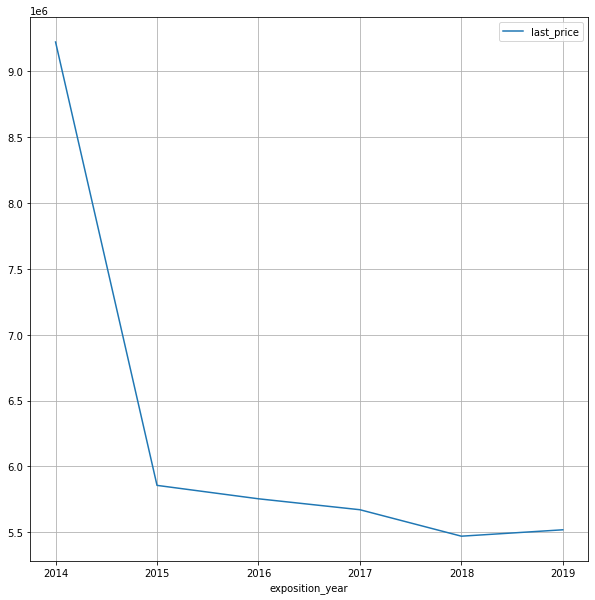

In [64]:
df.pivot_table(index='exposition_year', values='last_price')\
    .plot(grid=True, figsize=(10,10));

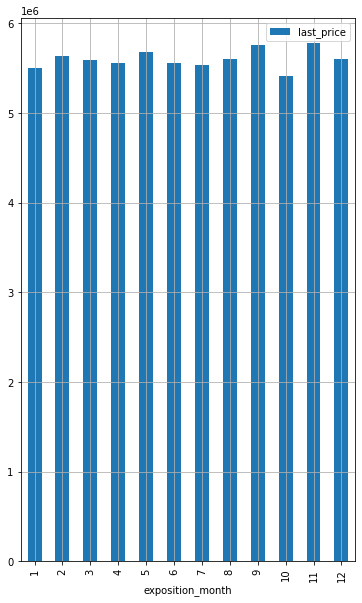

In [65]:
df.pivot_table(index='exposition_month', values='last_price')\
    .plot(grid=True, figsize=(6,10), kind='bar');

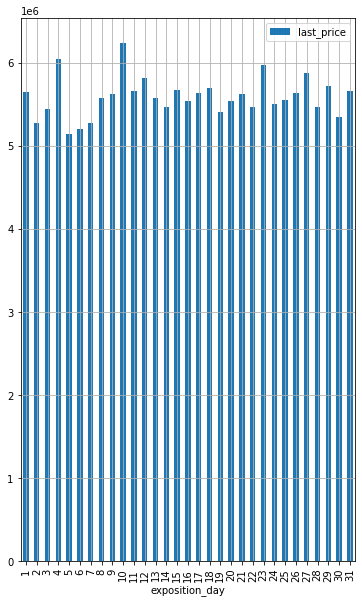

In [66]:
df.pivot_table(index='exposition_day', values='last_price')\
    .plot(grid=True, figsize=(6,10), kind='bar');

Взаимосвязи между днем недели публикации объявления и ценой не особо видно, что в общем-то очевидно, а вот по месяцам и годам можно придти к выводу, что начиная с 2014 года квартиры подешевели, и что самые популярные месяцы для продажи квартир по хорошей цене - это с апреля по сентябрь и декабрь. В январе и октябре - квартиры продавать не стоит, цены на рынке самые низкие.

#### Топ-10 населенных пунктов по количеству объявлений

Найдем 10 самых популярных населенных пунктов по количеству объявлений, изучим стоимость квартир в них.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16807 entries, 1 to 23695
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           16807 non-null  int64         
 1   last_price             16807 non-null  float64       
 2   total_area             16807 non-null  float64       
 3   first_day_exposition   16807 non-null  datetime64[ns]
 4   rooms                  16807 non-null  int64         
 5   ceiling_height         16807 non-null  float64       
 6   floors_total           16807 non-null  float64       
 7   living_area            16807 non-null  float64       
 8   floor                  16807 non-null  int64         
 9   is_apartment           16807 non-null  bool          
 10  studio                 16807 non-null  bool          
 11  open_plan              16807 non-null  bool          
 12  kitchen_area           16807 non-null  float64       
 13  b

In [68]:
df_top = df.pivot_table(index='locality_name', values='squaremeter_price', aggfunc=['count', 'mean'])
df_top.columns = ['count', 'mean_price']
df_top.sort_values(by='count', ascending=False).head(10)

,count,mean_price
locality_name,,
Санкт-Петербург,11278,108465.72
Мурино,411,85554.83
Шушары,352,77695.86
Кудрово,327,94430.56
Колпино,283,74446.76
Всеволожск,281,69061.91
Пушкин,258,102079.86
Парголово,255,89913.92
Гатчина,234,67863.46


In [69]:
df_top.sort_values(by='mean_price', ascending=False).head(1)

,count,mean_price
locality_name,,
Зеленогорск,20,108987.40


In [70]:
df_top.sort_values(by='mean_price', ascending=True).head(1)

,count,mean_price
locality_name,,
Совхозный,1,12555.00


Больше всего объявлений в Санкт-Петербурге, там же и самая высокая цена за квардратный метр. 
Самая дешевая средняя цена за квадратный метр в Старополье.

#### Изучение расстояния до центра в Санкт-Петербурге

Постараемся выяснить, как зависит цена от расстояния до центра в городе Санкт-Петербурге, где у нас больше всего объявлений о продаже квартир. 

In [71]:
df_spb = df.copy()
df_spb = df_spb[df_spb['locality_name'] == 'Санкт-Петербург']
df_spb['center_km'] = df_spb['city_сenters_nearest']/ 1000
df_spb['center_km'] = df_spb['center_km'].round()
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,squaremeter_price,exposition_year,exposition_month,exposition_day,floor_category,living_to_total_area,kitchen_to_total_area,center_km
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,True,...,574.00,558.00,92785,2015,8,20,другой,0.61,0.15,14.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,...,48.00,121.00,100000,2018,6,19,другой,0.32,0.41,8.00
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,True,...,0.00,289.00,88524,2017,2,26,другой,0.71,0.11,15.00
10,5,5050000.00,39.60,2017-11-16,1,2.67,12.00,20.30,3,True,...,553.00,137.00,127525,2017,11,16,другой,0.51,0.21,14.00
15,16,4650000.00,39.00,2017-11-18,1,2.65,14.00,20.50,5,True,...,296.00,19.00,119230,2017,11,18,другой,0.53,0.19,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.00,39.00,2017-12-16,1,2.65,9.00,20.00,6,True,...,0.00,38.00,82051,2017,12,16,другой,0.51,0.28,17.00
23688,19,9200000.00,101.00,2019-04-01,3,3.05,15.00,63.00,12,True,...,0.00,23.00,91089,2019,4,1,другой,0.62,0.15,14.00
23689,13,3550000.00,35.30,2018-02-28,1,2.86,15.00,16.30,4,True,...,652.00,29.00,100566,2018,2,28,другой,0.46,0.26,16.00
23690,3,5500000.00,52.00,2018-07-19,2,2.65,5.00,31.00,2,True,...,0.00,15.00,105769,2018,7,19,другой,0.60,0.12,6.00


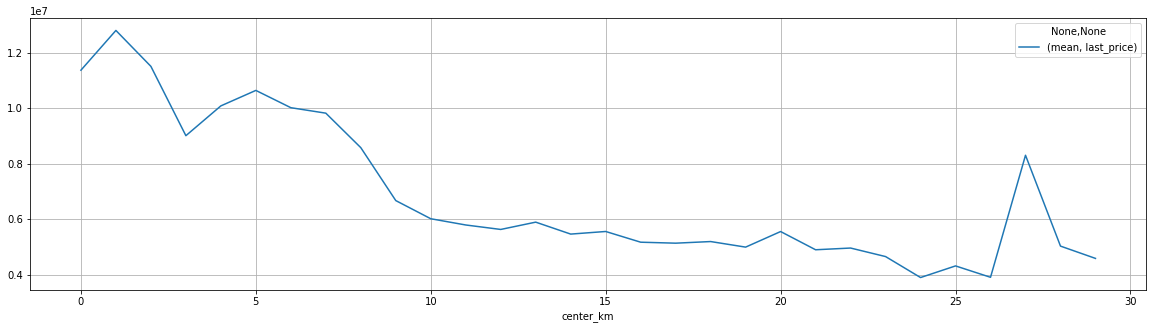

In [72]:
df_spb.pivot_table(index='center_km', values='last_price', aggfunc=['mean'])\
    .plot(grid=True, figsize=(20,5));

По нашему графику можно сделать вывод, что центр в Санкт-Петербурге ограничен радиусом порядка 7км, там самые дорогие квартиры. 

#### Изучение квартир в центре Санкт-Петербурга

Сделаем выборку квартир, расположенных в центре города и проведем их анализ, по аналогии с общим датафреймом

In [73]:
df_center = df_spb.query('center_km <7')
df_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,squaremeter_price,exposition_year,exposition_month,exposition_day,floor_category,living_to_total_area,kitchen_to_total_area,center_km
24,8,6500000.00,97.20,2015-10-31,2,2.65,3.00,46.50,1,True,...,124.00,265.00,66872,2015,10,31,первый,0.48,0.20,2.00
63,2,20000000.00,118.00,2018-09-11,3,3.00,9.00,68.00,7,True,...,779.00,37.00,169491,2018,9,11,другой,0.58,0.14,5.00
99,32,9600000.00,90.00,2017-09-26,4,2.65,5.00,67.00,2,True,...,0.00,104.00,106666,2017,9,26,другой,0.74,0.09,3.00
106,9,10500000.00,124.10,2017-05-25,5,3.20,4.00,79.40,3,True,...,0.00,6.00,84609,2017,5,25,другой,0.64,0.16,6.00
111,4,4590000.00,40.00,2017-05-29,1,2.65,6.00,18.00,1,True,...,0.00,31.00,114750,2017,5,29,первый,0.45,0.25,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23625,12,6700000.00,42.00,2019-02-13,2,2.70,5.00,24.00,5,True,...,837.00,26.00,159523,2019,2,13,последний,0.57,0.15,6.00
23644,7,4990000.00,62.50,2018-04-26,2,2.70,4.00,32.30,4,True,...,171.00,166.00,79840,2018,4,26,последний,0.52,0.19,4.00
23665,11,4250000.00,47.00,2016-05-20,1,2.65,6.00,18.20,1,False,...,519.00,131.00,90425,2016,5,20,первый,0.39,0.31,5.00
23690,3,5500000.00,52.00,2018-07-19,2,2.65,5.00,31.00,2,True,...,0.00,15.00,105769,2018,7,19,другой,0.60,0.12,6.00


Посмотрим коэффициенты корреляции по позициям `last_price`, `total_area`, `rooms`, `center_km`

In [74]:
df2 = df_center[['last_price', 'total_area', 'rooms', 'center_km']]
df2.corr()

,last_price,total_area,rooms,center_km
last_price,1.00,0.73,0.48,-0.06
total_area,0.73,1.00,0.81,-0.11
rooms,0.48,0.81,1.00,-0.14
center_km,-0.06,-0.11,-0.14,1.00


И выведем на экран матрицу диаграмм рассеяния для визуализации значений

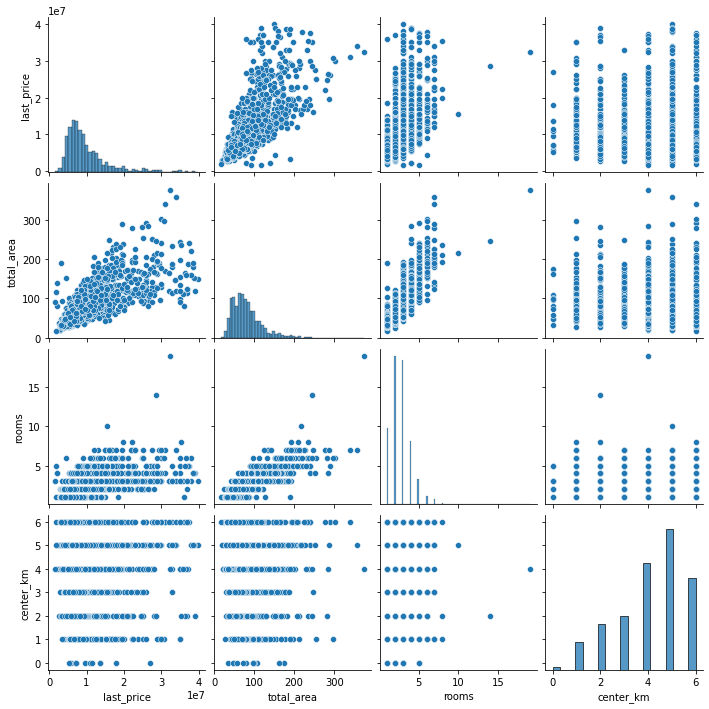

In [75]:
sns.pairplot(df2);

В центре Санкт-Петербурга картина немного другая:
- цена практически не зависит от расстояния до центра. Главное, что это "Центр"
- цена растет, в зависимости от площади и комнатности квартиры, так же как и во всем регионе

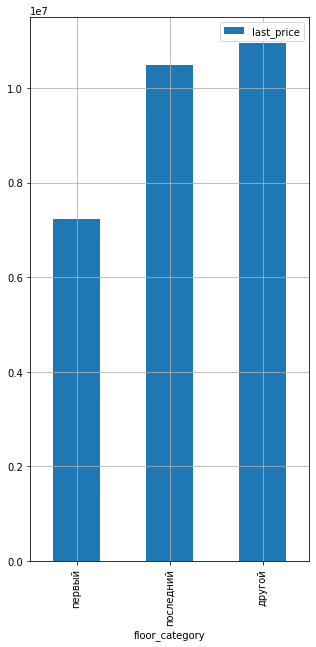

In [76]:
df_center.pivot_table(index='floor_category', values='last_price')\
    .sort_values(by='last_price', ascending=True)\
    .plot(grid=True, figsize=(5,10), kind='bar');

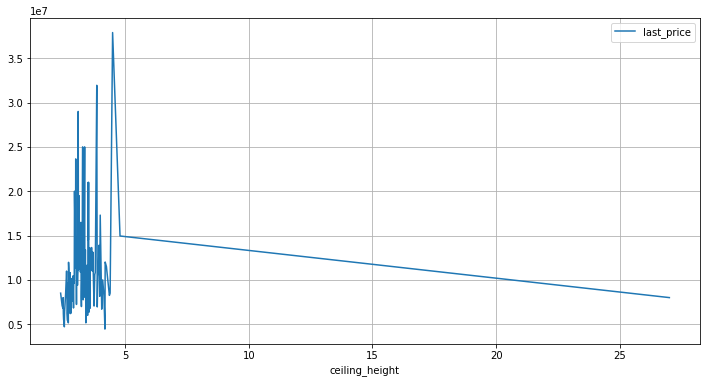

In [77]:
df_center.pivot_table(index='ceiling_height', values='last_price')\
    .plot(grid=True, figsize=(12,6));

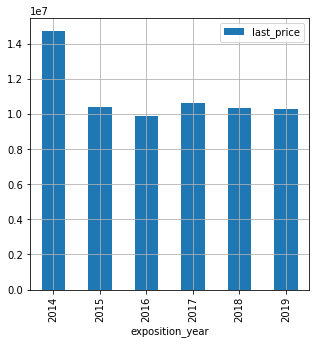

In [78]:
df_center.pivot_table(index='exposition_year', values='last_price')\
    .plot(grid=True, figsize=(5,5), kind='bar');

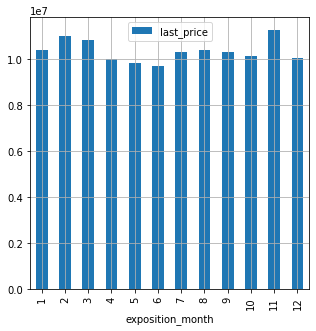

In [79]:
df_center.pivot_table(index='exposition_month', values='last_price')\
    .plot(grid=True, figsize=(5,5), kind='bar');

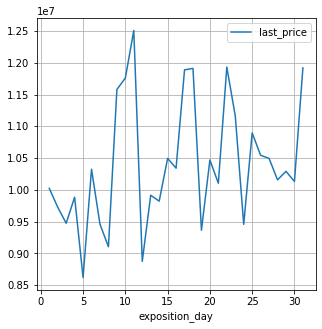

In [80]:
df_center.pivot_table(index='exposition_day', values='last_price')\
    .plot(grid=True, figsize=(5,5));

Ну и в конце проверим среднюю стоимость квартир в центре и в области, и среднюю стоимость квадратного метра:

In [81]:
df['last_price'].mean() / df_center['last_price'].mean()

0.5383032303901262

In [82]:
df['squaremeter_price'].mean()

95742.19825072886

#### Промежуточный вывод

По объявлениям в центре можно сделать следующие выводы:
- расстояние до центра в центральном районе не популярно, скорее наоборот, квартиры по хорошей цене продаются не в самом центре
- идет тенденция на рост цен в центре города 
- самые популярные месяцы для продаж - осень/зима, в отличии от общей выборки, где дороже всего квартиры проадвались летом
- в центре больше квартир в категории этажности - другие, в отличии от общей выборки, где последний этаж был более популярный
- трешки - самые дорогие квартиры в центре


## Общий вывод

В нашем исследовании у нас была база данных по квартиром в Ленинградской области с их стоимостью и различными параметрами.  
В начале мы обработали все пропущенные значения и привели данные к общему виду, после добавили важные критерии для каждой квартиры, такие как цена за квадратный метр, соотношения площадей. Определили и избавились от всех аномальных значений в представленном датафрейме.  
Мы определили, что чаще всего объявления висят в продаже до 600 дней, но в предоставленных данных были и квартиры, по которым не было данных о сроках объявления в продаже.
Также провели категоризацию квартир по этажам - первый, последний, другой.  

Проведенный анализ позволил нам увидеть следующие тенденции продаж квартир в Ленинградской области:
- Средняя стоимость квартир тем меньше, чем дальше квартира от центра, однако в центре квартиры дороже подальше от самого центра Санкт-Петербурга
- В центре Санкт-Петербурга люди предпочитают квартиры не на последнем и не на первом этаже, а в области, наоборот, в приоритете последний этаж
- Стоимость квартир напрямую зависит от площади и комнатности во всем регионе
- В Санкт-Петербурге больше всего объявлений о продаже квартир, в разы больше, чем в других городах
- В области выгоднее всего продавать квартиру летом, в центре - осенью/зимой
- Средняя стоимость квартир в центре почти в два раза выше, чем в области
- В центре средняя цена квадратного метра на 35 тысяч выше чем в области 
- Во всем регионе квартиры на 1 этаже - это самые непопулярные в продаже квартиры, у них и цена ниже

В заключении можно сказать, что оценив полученные данные, можно смело сказать, что в центре Петербурга цены на квартиры растут, но их рыночная стоимость и выше, чем в области в два раза. А самыми популярными являются 2-3-комнатные квартиры, площадью до 150м2. 